In [1]:
import pandas as pd
import numpy as np

In [2]:
close = pd.read_hdf('data/close.h5')
pre_close = pd.read_hdf('data/pre_close.h5')

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
# 归一化
def scaler(data):
    return (data-data.mean())/data.std()
close = scaler(close.T).T
# close = scaler(close)
y = close['399108.SZ']
x = close.drop('399108.SZ',axis = 1)

In [9]:
close

,399108.SZ,200011.SZ,200012.SZ,200016.SZ,200017.SZ,200019.SZ,200020.SZ,200025.SZ,200026.SZ,200028.SZ,...,200596.SZ,200625.SZ,200706.SZ,200725.SZ,200726.SZ,200761.SZ,200771.SZ,200869.SZ,200992.SZ,201872.SZ
2005-01-04,6.382427,-0.196555,-0.113919,-0.150315,-0.225492,-0.172689,-0.213559,-0.200135,-0.189395,-0.180744,...,-0.172689,-0.155386,-0.164634,-0.189395,-0.072452,-0.170601,-0.002943,-0.021737,-0.221912,0.216325
2005-01-05,6.383356,-0.196492,-0.114886,-0.148057,-0.224672,-0.173302,-0.212637,-0.200014,-0.187686,-0.179173,...,-0.173008,-0.154515,-0.164202,-0.187686,-0.073496,-0.170660,-0.003338,-0.026235,-0.222618,0.207135
2005-01-06,6.383600,-0.196133,-0.116152,-0.146733,-0.223773,-0.170550,-0.213481,-0.199661,-0.189664,-0.179960,...,-0.172609,-0.153790,-0.163493,-0.187311,-0.072927,-0.170256,-0.002943,-0.026467,-0.224067,0.204655
2005-01-07,6.383971,-0.195589,-0.116016,-0.145820,-0.223945,-0.172440,-0.212950,-0.200508,-0.188644,-0.179095,...,-0.173019,-0.152764,-0.163181,-0.185172,-0.072034,-0.170993,-0.007508,-0.027473,-0.222788,0.199960
2005-01-10,6.384236,-0.195693,-0.116166,-0.147862,-0.223931,-0.172642,-0.211253,-0.200304,-0.185896,-0.177540,...,-0.172642,-0.152184,-0.160828,-0.186185,-0.073810,-0.171489,-0.009554,-0.026843,-0.224507,0.198484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,6.364828,-0.159798,-0.175969,-0.181579,-0.185154,-0.172119,-0.177454,-0.168653,-0.157378,-0.092309,...,0.553372,-0.171514,-0.177619,-0.172339,-0.165078,-0.183944,-0.135597,-0.127566,-0.177179,-0.147697
2023-01-11,6.365637,-0.159605,-0.175914,-0.181442,-0.185036,-0.172099,-0.177296,-0.168838,-0.157339,-0.092270,...,0.545981,-0.171491,-0.176688,-0.172099,-0.164912,-0.183820,-0.134562,-0.127707,-0.177130,-0.147222
2023-01-12,6.368759,-0.159164,-0.175357,-0.181092,-0.184634,-0.171365,-0.176763,-0.167598,-0.155902,-0.089835,...,0.516407,-0.170746,-0.176200,-0.171590,-0.164393,-0.183397,-0.132624,-0.126664,-0.176482,-0.146400
2023-01-13,6.367279,-0.159480,-0.175491,-0.181272,-0.184830,-0.171710,-0.176992,-0.168319,-0.156256,-0.091268,...,0.530589,-0.170821,-0.176603,-0.171933,-0.164761,-0.183552,-0.132407,-0.127070,-0.176825,-0.146972


In [5]:
# from sklearn.model_selection import train_test_split
# xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3)
n = close.shape[0]//3*2
xtrain = x.iloc[:n,:]
xtest = x.iloc[n:,:]
ytrain =  y[:n]
ytest = y[n:]

In [11]:
xtrain

,200011.SZ,200012.SZ,200016.SZ,200017.SZ,200019.SZ,200020.SZ,200025.SZ,200026.SZ,200028.SZ,200029.SZ,...,200596.SZ,200625.SZ,200706.SZ,200725.SZ,200726.SZ,200761.SZ,200771.SZ,200869.SZ,200992.SZ,201872.SZ
2005-01-04,-0.196555,-0.113919,-0.150315,-0.225492,-0.172689,-0.213559,-0.200135,-0.189395,-0.180744,-0.194765,...,-0.172689,-0.155386,-0.164634,-0.189395,-0.072452,-0.170601,-0.002943,-0.021737,-0.221912,0.216325
2005-01-05,-0.196492,-0.114886,-0.148057,-0.224672,-0.173302,-0.212637,-0.200014,-0.187686,-0.179173,-0.195905,...,-0.173008,-0.154515,-0.164202,-0.187686,-0.073496,-0.170660,-0.003338,-0.026235,-0.222618,0.207135
2005-01-06,-0.196133,-0.116152,-0.146733,-0.223773,-0.170550,-0.213481,-0.199661,-0.189664,-0.179960,-0.195251,...,-0.172609,-0.153790,-0.163493,-0.187311,-0.072927,-0.170256,-0.002943,-0.026467,-0.224067,0.204655
2005-01-07,-0.195589,-0.116016,-0.145820,-0.223945,-0.172440,-0.212950,-0.200508,-0.188644,-0.179095,-0.194431,...,-0.173019,-0.152764,-0.163181,-0.185172,-0.072034,-0.170993,-0.007508,-0.027473,-0.222788,0.199960
2005-01-10,-0.195693,-0.116166,-0.147862,-0.223931,-0.172642,-0.211253,-0.200304,-0.185896,-0.177540,-0.193676,...,-0.172642,-0.152184,-0.160828,-0.186185,-0.073810,-0.171489,-0.009554,-0.026843,-0.224507,0.198484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-05,-0.159085,-0.171516,-0.190512,-0.176919,-0.165707,-0.166288,-0.129575,-0.161467,0.062007,-0.173724,...,-0.034423,-0.142994,-0.178081,-0.193475,-0.151940,-0.190512,-0.156761,-0.085020,-0.172272,-0.132654
2017-01-06,-0.158358,-0.172071,-0.190511,-0.176798,-0.165302,-0.166353,-0.129706,-0.162443,0.065196,-0.173705,...,-0.034064,-0.142894,-0.178199,-0.193662,-0.151823,-0.190745,-0.157483,-0.084832,-0.172597,-0.133558
2017-01-09,-0.158590,-0.172110,-0.190641,-0.176597,-0.165175,-0.166457,-0.129569,-0.162086,0.065651,-0.173799,...,-0.034406,-0.143030,-0.178228,-0.193671,-0.152121,-0.190816,-0.157774,-0.086038,-0.171585,-0.134231
2017-01-10,-0.158885,-0.171586,-0.190462,-0.176421,-0.164944,-0.166983,-0.130628,-0.162322,0.061110,-0.173683,...,-0.034380,-0.142746,-0.178053,-0.193550,-0.152184,-0.190695,-0.158069,-0.086699,-0.171469,-0.134473


{'r2': 1.0, 'MSE': 8.230700580192417e-30, 'MAE': 2.2757293845394454e-15}


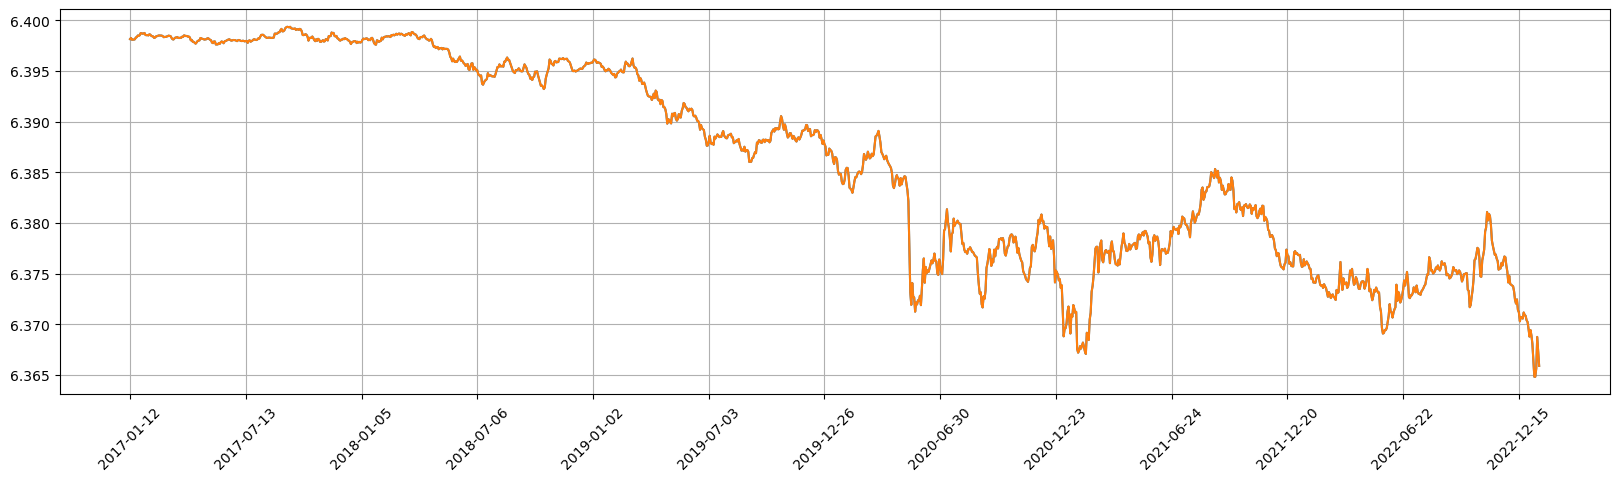

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

LR = LinearRegression().fit(xtrain, ytrain)
y_pred = LR.predict(xtest)
score = {}
score['r2'] = r2_score(y_pred,ytest)
score['MSE'] = mean_squared_error(y_pred,ytest)
score['MAE'] = mean_absolute_error(y_pred,ytest)
print(score)

import matplotlib.ticker as ticker
fig = plt.figure(figsize = (20,5))
plt.plot(y_pred)
plt.plot(ytest)
plt.xticks(rotation = 45)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(120))
plt.grid()
plt.show()

In [7]:
score_all = {}
score_all['LR_all_feature'] = score

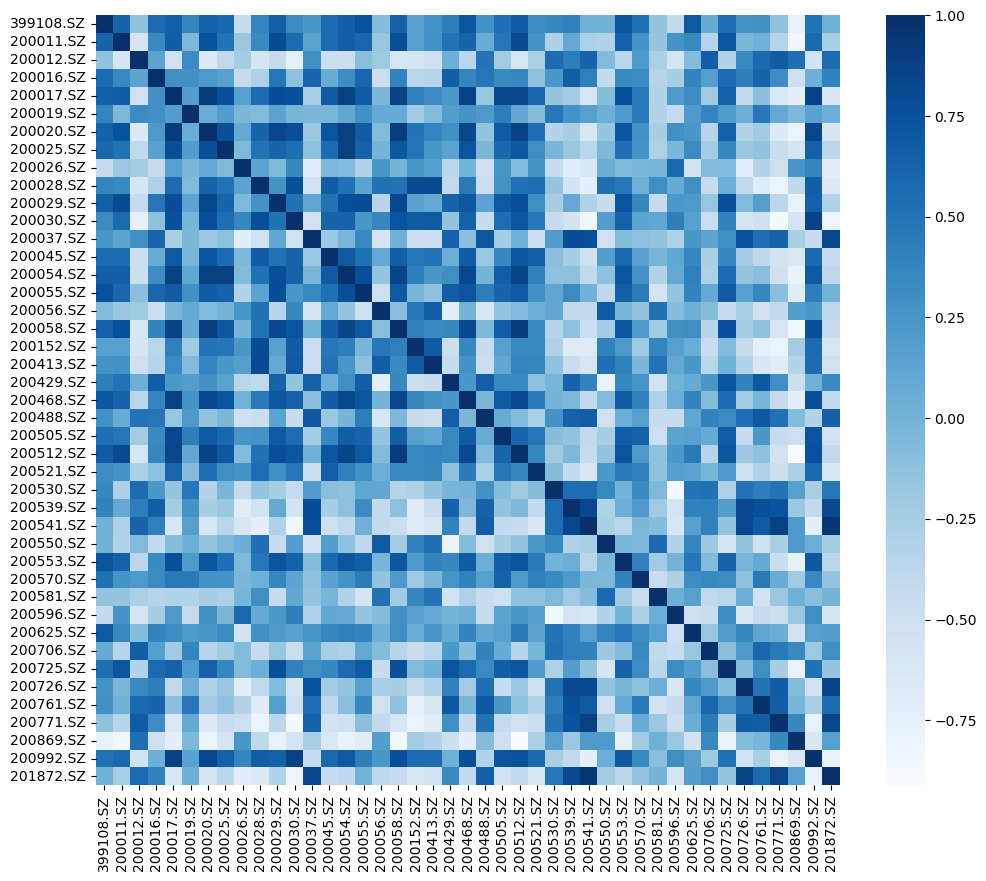

In [8]:
import seaborn as sns

corr = close.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap=plt.cm.Blues)
plt.show()

# 相关性比较高

In [55]:
from sklearn.feature_selection import SelectPercentile, f_regression, SelectKBest
import matplotlib.ticker as ticker
Score = {}
for k in range(5,25,5):
    selection = SelectKBest(f_regression,k=k).fit(xtrain, ytrain)
    xtrain_new = selection.transform(xtrain)
    # print(selection.feature_names_in_)
    # print('origin',xtrain.shape)
    # print('new',xtrain_new.shape)
    LR = LinearRegression().fit(xtrain_new, ytrain)
    y_pred = LR.predict(selection.transform(xtest))
    score = {}
    score['r2'] = r2_score(y_pred,ytest)
    score['MSE'] = mean_squared_error(y_pred,ytest)
    score['MAE'] = mean_absolute_error(y_pred,ytest)
    Score[k] = score
    # print(k,score)

# fig = plt.figure(figsize = (20,5))
# plt.plot(y_pred,label = 'fitted')
# plt.plot(ytest,label = 'original')
# plt.xticks(rotation = 45)
# plt.legend()
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(120))
# plt.grid()
# plt.show()
pd.DataFrame(Score).T.round(4)

,r2,MSE,MAE
5,0.6345,0.0,0.0049
10,0.8905,0.0,0.0025
15,0.9570,0.0,0.0016
20,0.8002,0.0,0.0044


In [20]:
from sklearn.feature_selection import mutual_info_regression
for k in range(5,25,2):
    selection = SelectKBest(mutual_info_regression,k=k).fit(xtrain, ytrain)
    xtrain_new = selection.transform(xtrain)
    # print(selection.feature_names_in_)
    # print('origin',xtrain.shape)
    # print('new',xtrain_new.shape)
    LR = LinearRegression().fit(xtrain_new, ytrain)
    y_pred = LR.predict(selection.transform(xtest))
    score = {}
    score['r2'] = r2_score(y_pred,ytest)
    score['MSE'] = mean_squared_error(y_pred,ytest)
    score['MAE'] = mean_absolute_error(y_pred,ytest)
    print(k,score)

5 {'r2': -0.2832296849853426, 'MSE': 0.0002857508511548783, 'MAE': 0.015878330727247484}
7 {'r2': 0.285970500130016, 'MSE': 0.00012393484908716746, 'MAE': 0.010282393631500459}
9 {'r2': 0.27812905177082037, 'MSE': 0.00011044487421857958, 'MAE': 0.009905923486135865}
11 {'r2': -0.4517131456856467, 'MSE': 0.0003030541952836599, 'MAE': 0.016465560118538763}
13 {'r2': -0.38797105394393894, 'MSE': 0.0003368363758426093, 'MAE': 0.017130083836545712}
15 {'r2': -0.46296607667021417, 'MSE': 0.00039483794716662496, 'MAE': 0.018465932021766423}
17 {'r2': -0.40943726596409125, 'MSE': 0.00038164175847226774, 'MAE': 0.018101414549856563}
19 {'r2': -0.21720334973043132, 'MSE': 0.0002761887910027913, 'MAE': 0.015452338250037384}
21 {'r2': 0.15608557535663115, 'MSE': 0.0001879508658854674, 'MAE': 0.012455686769364038}
23 {'r2': 0.08304316828311054, 'MSE': 0.0002018803722917951, 'MAE': 0.01304639658007667}


In [38]:
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model

for a in [1e-3,1e-4,1e-5,1e-6,1e-7]:
    lasso = linear_model.Lasso(alpha=a).fit(xtrain, ytrain)
    # print(lasso.coef_)
    y_pred = lasso.predict(xtest)
    score = {}
    score['r2'] = r2_score(y_pred,ytest)
    score['MSE'] = mean_squared_error(y_pred,ytest)
    score['MAE'] = mean_absolute_error(y_pred,ytest)
    print(a,',feature_n:',(lasso.coef_!=0).sum(),score)


0.001 ,feature_n: 2 {'r2': -15.139101828229329, 'MSE': 8.37091612891497e-05, 'MAE': 0.00748992012259351}
0.0001 ,feature_n: 3 {'r2': 0.21157396436686549, 'MSE': 0.00011533603137294977, 'MAE': 0.010216562613091725}
1e-05 ,feature_n: 9 {'r2': 0.25627431179259497, 'MSE': 0.000126528834739186, 'MAE': 0.010494278562056099}
1e-06 ,feature_n: 28 {'r2': 0.7213772458549004, 'MSE': 2.501525977084264e-05, 'MAE': 0.004245713622200758}
1e-07 ,feature_n: 40 {'r2': 0.8448964861688066, 'MSE': 1.1099699547556736e-05, 'MAE': 0.002828381240741077}


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.931e-03, tolerance: 1.241e-04
  model = cd_fast.enet_coordinate_descent(


In [50]:
import warnings
warnings.filterwarnings('ignore')
# 顺序特征选择（逐步回归）
from sklearn.feature_selection import SequentialFeatureSelector
for k in range(5,25,2):
    LR = LinearRegression().fit(xtrain, ytrain)
    sfs_forward = SequentialFeatureSelector(LR, n_features_to_select=k,direction='forward').fit(xtrain, ytrain)
    LR = LinearRegression().fit(xtrain[xtest.columns[sfs_forward.get_support()]], ytrain)
    y_pred = LR.predict(xtest[xtest.columns[sfs_forward.get_support()]])
    score = {}
    score['r2'] = r2_score(y_pred,ytest)
    score['MSE'] = mean_squared_error(y_pred,ytest)
    score['MAE'] = mean_absolute_error(y_pred,ytest)
    print(k,score)


5 {'r2': -73.38269934566055, 'MSE': 0.0002809688362471614, 'MAE': 0.01298739477240515}
7 {'r2': -77.23133494465395, 'MSE': 0.0003169347708490821, 'MAE': 0.01440361894424599}
9 {'r2': -57.01238127685926, 'MSE': 0.00025142738347590064, 'MAE': 0.012221950278760609}
11 {'r2': -56.567199396806004, 'MSE': 0.00025255768295935534, 'MAE': 0.012233633110190219}
13 {'r2': -32.91460474518853, 'MSE': 0.0001941066598951829, 'MAE': 0.010526554695285642}
15 {'r2': -31.719292088615425, 'MSE': 0.00018963846050463126, 'MAE': 0.010362527956598899}
17 {'r2': -23.353038383868146, 'MSE': 0.00015934225003618894, 'MAE': 0.009492777348838584}
19 {'r2': -13.6812233004706, 'MSE': 0.00015487657047973084, 'MAE': 0.009463874094590406}
21 {'r2': -6.362337068433137, 'MSE': 0.0001017307657066368, 'MAE': 0.007927598137756637}
23 {'r2': -8.627748709805983, 'MSE': 0.00012191845728904603, 'MAE': 0.008525796460663041}


In [44]:
sfs_forward

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=10)

In [ ]:

sfs_backward = SequentialFeatureSelector(lasso, n_features_to_select=k,direction='backward').fit(xtrain, ytrain)


# Features selected by forward sequential selection: ['bmi' 's5']
# Done in k.177s
# Features selected by backward sequential selection: ['bmi' 's5']
# Done in 6.433s

,200011.SZ,200016.SZ,200019.SZ,200058.SZ,200512.SZ,200570.SZ,200581.SZ,200625.SZ,200706.SZ,200869.SZ
2017-01-12,-0.159124,-0.190187,-0.165419,-0.178009,-0.166125,-0.178303,-0.097173,-0.143768,-0.177832,-0.087936
2017-01-13,-0.160056,-0.189637,-0.167198,-0.177554,-0.165829,-0.178030,-0.099346,-0.142914,-0.177316,-0.089050
2017-01-16,-0.160641,-0.189453,-0.167677,-0.178110,-0.166525,-0.177625,-0.099802,-0.141534,-0.176958,-0.087792
2017-01-17,-0.159798,-0.189460,-0.167937,-0.178006,-0.166611,-0.177764,-0.100776,-0.141652,-0.177222,-0.087030
2017-01-18,-0.159260,-0.189503,-0.167875,-0.178117,-0.166730,-0.177815,-0.100459,-0.141306,-0.177394,-0.088651
...,...,...,...,...,...,...,...,...,...,...
2023-01-10,-0.159798,-0.181579,-0.172119,-0.181964,-0.172944,-0.180094,-0.116566,-0.171514,-0.177619,-0.127566
2023-01-11,-0.159605,-0.181442,-0.172099,-0.181829,-0.173039,-0.180226,-0.116263,-0.171491,-0.176688,-0.127707
2023-01-12,-0.159164,-0.181092,-0.171365,-0.181486,-0.172489,-0.179743,-0.115531,-0.170746,-0.176200,-0.126664
2023-01-13,-0.159480,-0.181272,-0.171710,-0.181717,-0.172933,-0.179883,-0.116285,-0.170821,-0.176603,-0.127070


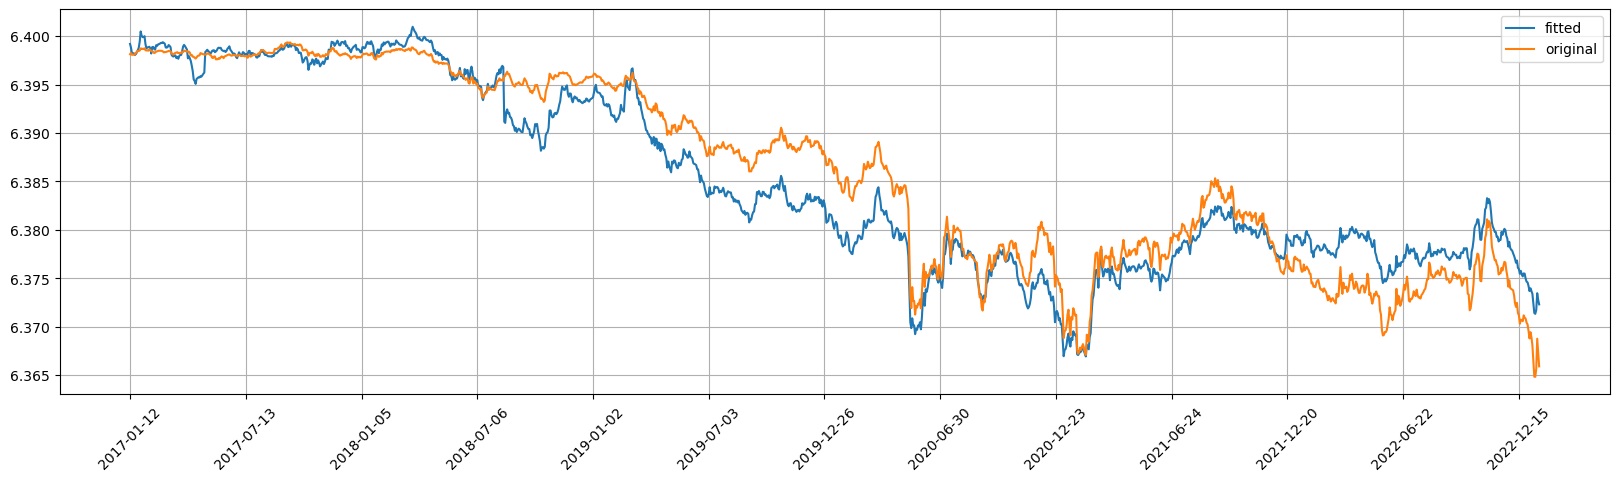

In [56]:
k = 10
selection = SelectKBest(f_regression,k=k).fit(xtrain, ytrain)
xtrain_new = selection.transform(xtrain)
# print(selection.feature_names_in_)
# print('origin',xtrain.shape)
# print('new',xtrain_new.shape)
LR = LinearRegression().fit(xtrain_new, ytrain)
y_pred = LR.predict(selection.transform(xtest))
fig = plt.figure(figsize = (20,5))
plt.plot(y_pred,label = 'fitted')
plt.plot(ytest,label = 'original')
plt.xticks(rotation = 45)
plt.legend()
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(120))
plt.grid()
plt.show()